Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.   
Задача - выявить определяющие успешность игры закономерности для выделения потенциально популярных продуктов и планирования рекламных кампаний в интернет-магазине, продающем по всему миру компьютерные игры.  
Датасет содержит:  
    Name — название игры  
    Platform — платформа  
    Year_of_Release — год выпуска  
    Genre — жанр игры  
    NA_sales — продажи в Северной Америке (миллионы проданных копий)  
    EU_sales — продажи в Европе (миллионы проданных копий)  
    JP_sales — продажи в Японии (миллионы проданных копий)  
    Other_sales — продажи в других странах (миллионы проданных копий)  
    Critic_Score — оценка критиков (макс 100)  
    User_Score — оценка пользователей (макс 10)  
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board), определяющей рейтинг компьютерных игр и присваивающей им подходящую возрастную категорию.  
Данные за 2016 год неполные.

[1  Изучение общей информации](#1)   
[2  Подготовка данных](#2)  
[3  Исследовательский анализ данных](#3)   
[4  Портрет пользователя каждого региона](#4)   
[5  Проверка гипотез](#5)   
[6  Общий вывод](#6)   

## Изучение общей информации
<a id='1'></a>

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
from math import factorial
from scipy.stats import norm
import matplotlib.pyplot as plt 
import seaborn as sns
import math

data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
display(data)
data.info()
print('')
print('Процент пропусков в данных:')
(data.isna().mean()*100).to_frame().style.background_gradient(cmap='cool')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Процент пропусков в данных:


,0
Name,0.0119653
Platform,0
Year_of_Release,1.60933
Genre,0.0119653
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.3192
User_Score,40.0897


### Вывод


В данных есть маленькое количество пропусков в годе выпуска, а также около половины значений отсутствуют для данных по оценкам пользователей и критиков и рейтингу. 

## Подготовка данных
<a id='2'></a>

Удалим 2 строки с пропущенными значениями названия игры и жанра.  
Отсутствующие годы выпуска заменим на ноль.  
Отсутствующие оценки критиков и пользователей на техническое значение -1, т.к. достаточно достоверно заполнить пропуски не представляется возможным.   
Тип данных в колонке с годом выпуска - на целочисленный, в колонке с оценкой критиков тоже, т.к. все значения целые.   
Тип данных в колонке с оценкой пользователей заменим на float64.   
Также на -1 заменим значение 'tbd' в оценках пользователей, скорее всего, появление этого значения связано с технической ошибкой при выгрузке данных или слишком малым количеством оценок. 

In [3]:
data.columns = data.columns.str.lower()

data = data.dropna(subset=['name'])

data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1).astype('int')

data['user_score'] = data['user_score'].fillna(-1)
data.loc[(data.user_score == 'tbd'), 'user_score'] = -1

data['user_score'] = data['user_score'].astype('float')


data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.loc[data['rating'].isna(), 'rating'] = data.loc[data['rating'].isna(), 'name'].map(data.groupby('name')['rating'].first())
data['rating'] = data['rating'].fillna('unknown')

print(data.info())

data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


### Вывод

Данные подготовлены для дальнейшего анализа: обработаны пропуски,  данные преобразованы в нужные типы, подсчитаны суммарные продажи во всех регионах и записаны в столбец total_sales.

## Исследовательский анализ данных
<a id='3'></a>

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64


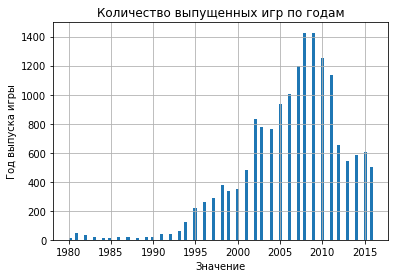

In [4]:
print(data['year_of_release'].value_counts())
hist = data['year_of_release'].plot(kind='hist', bins=100, range = (1980, 2016))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Значение')
plt.ylabel('Год выпуска игры')
plt.grid()
plt.show()

Больше всего игр было выпущено с 2007 по 2011 год. До 1991 годы игр выпускалось совсем мало, далее начался почти ежегодный довольно плавный рост, а после 2001 года количество выпускаемых игр сильно возросло. После 2011 года количество выпускаемых игр сократилось примерно вдвое.   
Поскольку до 2001 года игр выпускалось немного и на текущий момент они уже явно неакутальны в тех версиях, для дальнейшего анализа изменения продаж по платформам возьмем игры, выпущенные после 2000 года.

In [5]:
data1 = data.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
data1 = data1.query('year_of_release > 2000').copy().reset_index(drop=True)
print(data1['total_sales'].sum())
display(data1)

6957.4900000000025


,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
136,XB,2008,0.18
137,XOne,2013,18.96
138,XOne,2014,54.07
139,XOne,2015,60.14


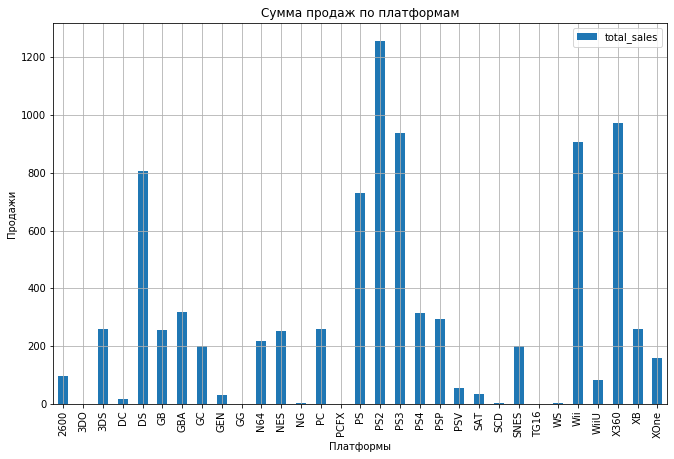

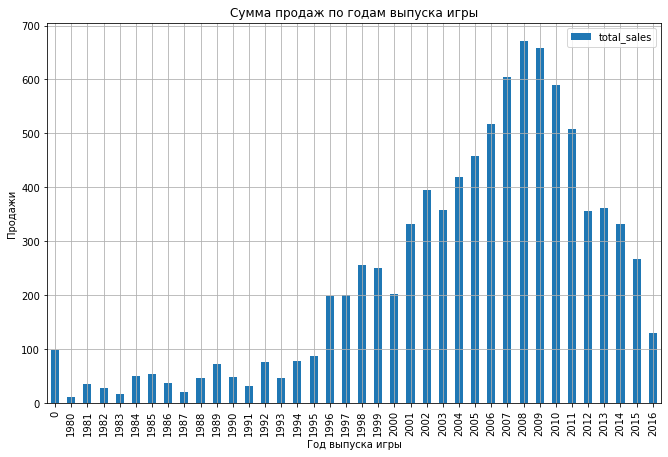

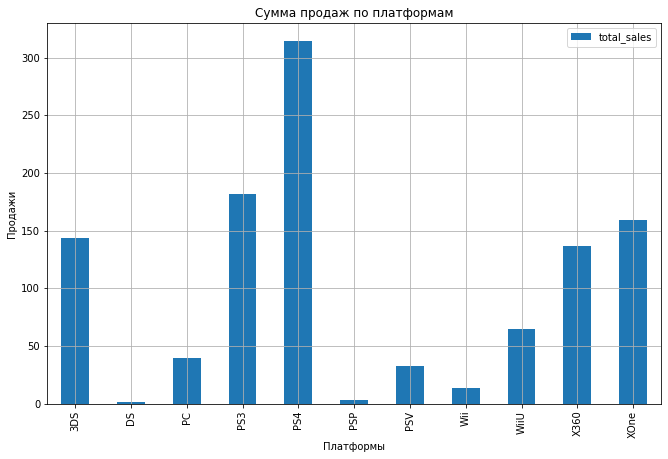

In [6]:

data.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(
    kind = 'bar', grid=True, title ='Сумма продаж по платформам', figsize = (11,7))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
    kind = 'bar', grid=True, title ='Сумма продаж по годам выпуска игры', figsize = (11,7))
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи')
plt.show()

data.query('year_of_release>2012').pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(
    kind = 'bar', grid=True, title ='Сумма продаж по платформам', figsize = (11,7))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()


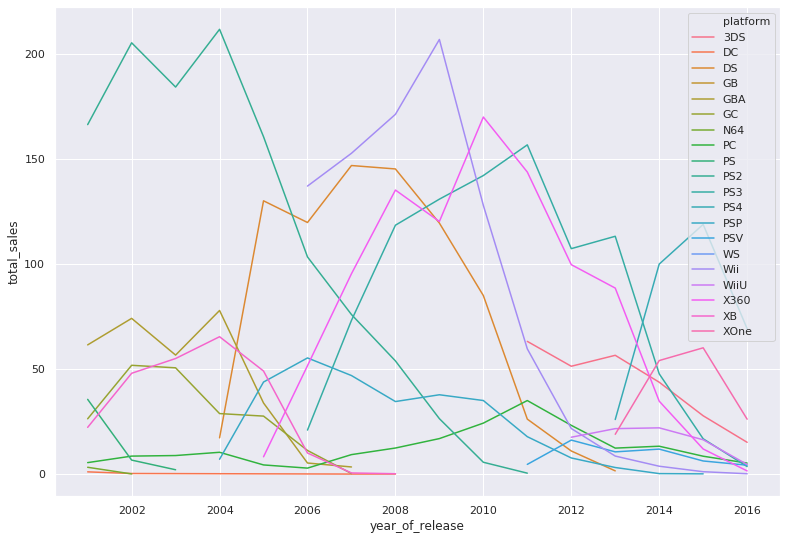

In [7]:
sns.set(rc={'figure.figsize':(13,9)})
sns.lineplot(x='year_of_release', y='total_sales',
             hue='platform',
             data=data1)

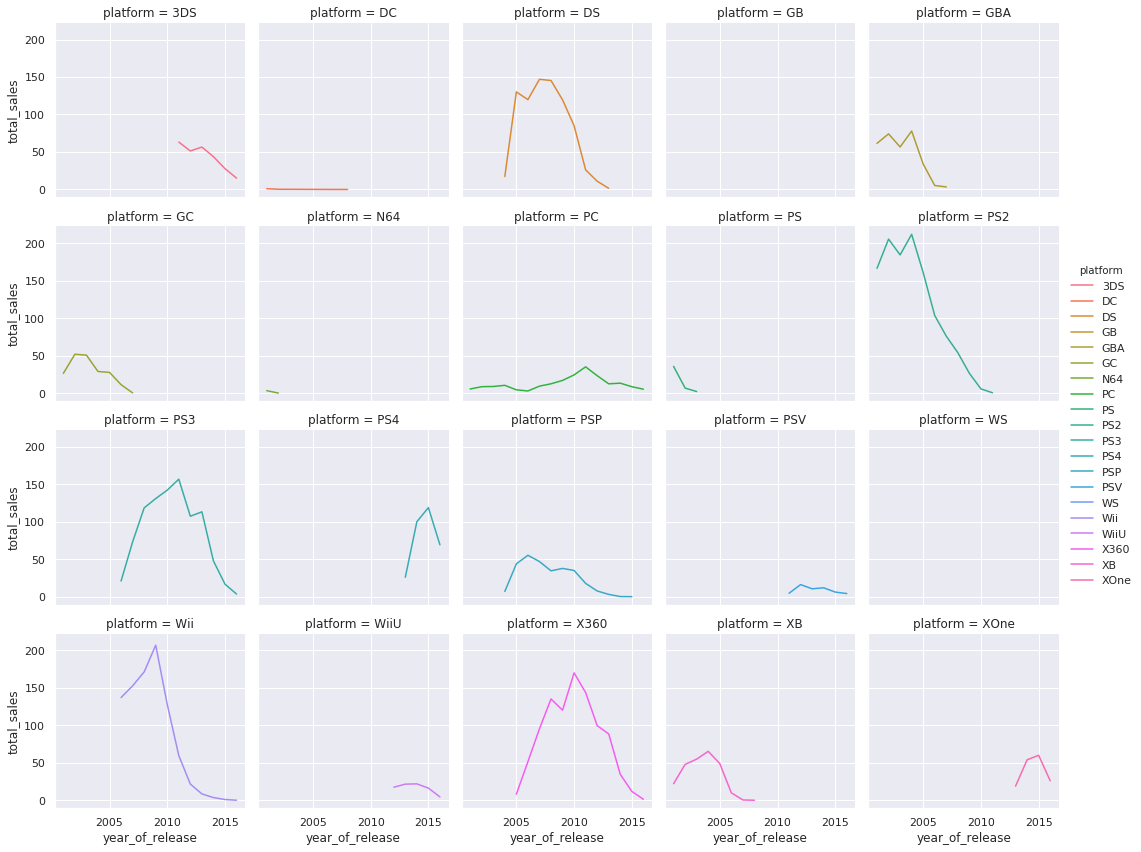

In [8]:
grid = sns.FacetGrid(data1, col="platform", hue="platform", col_wrap=5)
grid.map(sns.lineplot, "year_of_release", "total_sales")
grid.add_legend()

В среднем от появления до исчезновения платформы проходит около 8-10 лет. 
Посмотрим, на каких платформах были наибольшие суммарные продажи за последние 5 лет (для минимизации платформ, популярность которых уже падает).

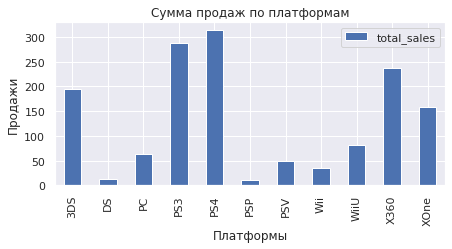

In [9]:
data.query('year_of_release>=2012').pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(
    kind = 'bar', grid=True, title ='Сумма продаж по платформам', figsize = (7,3))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Построим распределение продаж по годам для платформ с наибольшими суммарными продажами за последние 5 лет, а именно для: PS4, 3DS, PC, PS3, X360, WiiU, XOne.

Платформа PS4


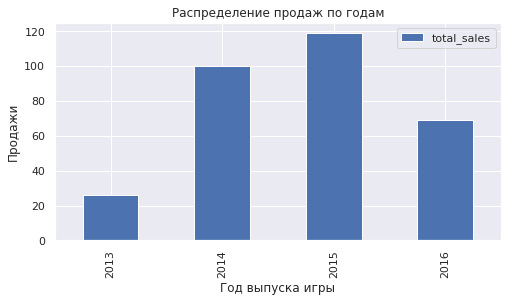

Платформа 3DS


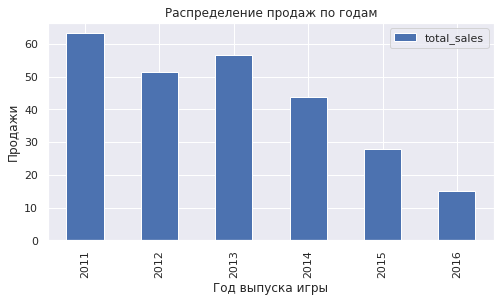

Платформа PC


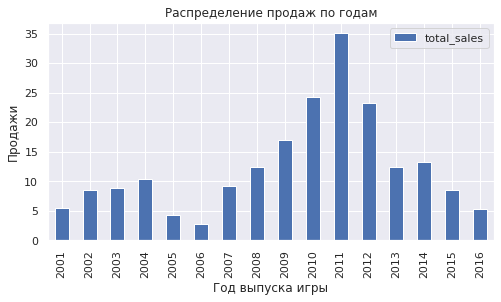

Платформа PS3


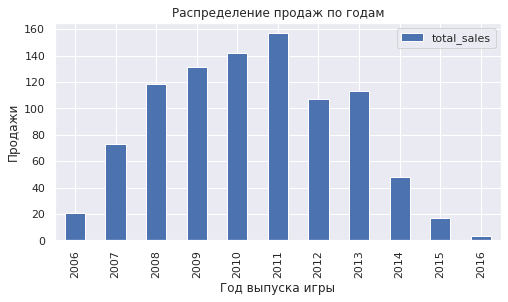

Платформа X360


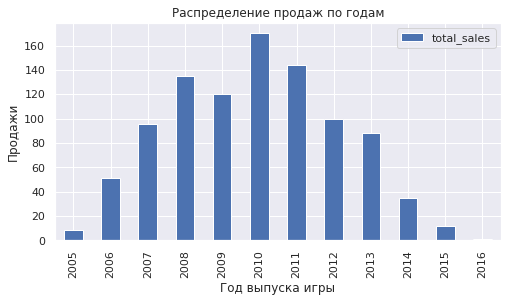

Платформа WiiU


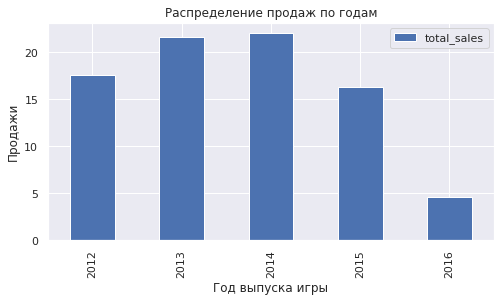

Платформа XOne


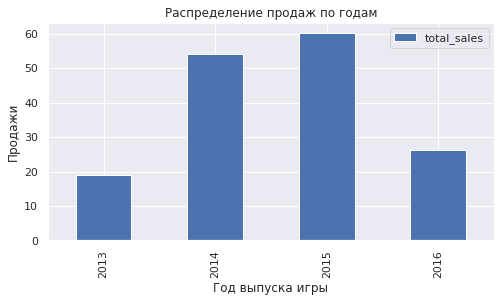

In [10]:
def res(df, pl):
    print('Платформа', pl)
    df.loc[df['platform'] == pl].pivot_table(index='year_of_release', 
                                                 values='total_sales', aggfunc='sum').plot(kind = 'bar', grid=True, title = 'Распределение продаж по годам', figsize = (8,4))
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Продажи')
    plt.show()
    
plat_list = ['PS4', '3DS', 'PC', 'PS3', 'X360', 'WiiU', 'XOne']
for i in plat_list:
    res(data1, i) 

Показатели за 2016 год по всем платформам падают, но, при этом следует иметь ввиду, что данные за 2016 год могут быть неполными.    
Продажи для платформы PS4 растут (кроме 2016 г.) и на основе предыдущего анализа по другим платформам можно сказать, что она находится на пике. Кроме того, данная платформа является лидером по продажам.     
Еще один из лидеров по продажам - платформа XOne также, скорее всего, находится в стадии роста. Снижение, опять же, только в 2016 году, что может быть связано с неполными данными.   
Продажи по платформе 3DS стабильно падают, начиная с 2013 года, но по-прежнему, являются одними из самых высоких.  
Платформы PS3 и X360 имели одни из самых высоких показателей суммарных продаж за последние пять лет, но после 2010-2011 гг. продажи падали и по состоянию на 2016 год имеют очень низкие значения, особенно для платформы X360.  
Продажи для WiiU начали снижаться, но, вероятно, на протяжении еще пары лет будут оставаться на достаточно высоком для данной платформы уровне.   
Ну и для PC, несмотря на фазу снижения, продажи всегда будут присутствовать на достаточно существенном уровне.    
Таким образом, наиболее потенциально прибыльными платформами являются PS4, XOne, 3DS и PC.

In [11]:
data_act_per = data.query('year_of_release>=2012').copy().reset_index(drop=True)
data_act_per_plat = data_act_per.query('platform in ["PS4","XOne","3DS","PC", "WiiU"]').copy().reset_index(drop=True)


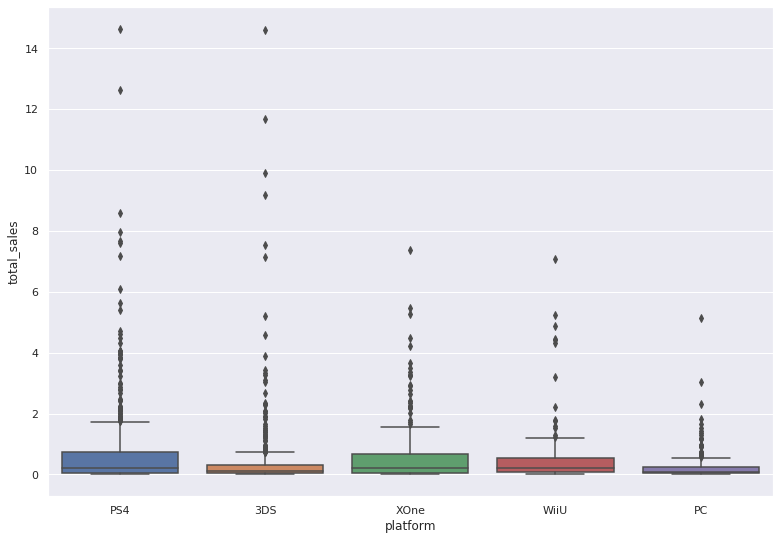

In [12]:
total_sales = data_act_per_plat["total_sales"]
sns.boxplot(x=data_act_per_plat["platform"], y=total_sales)

Самые крупные выбросы - у платформ PS4, 3DS, причем макимальные значения примерно равны. 

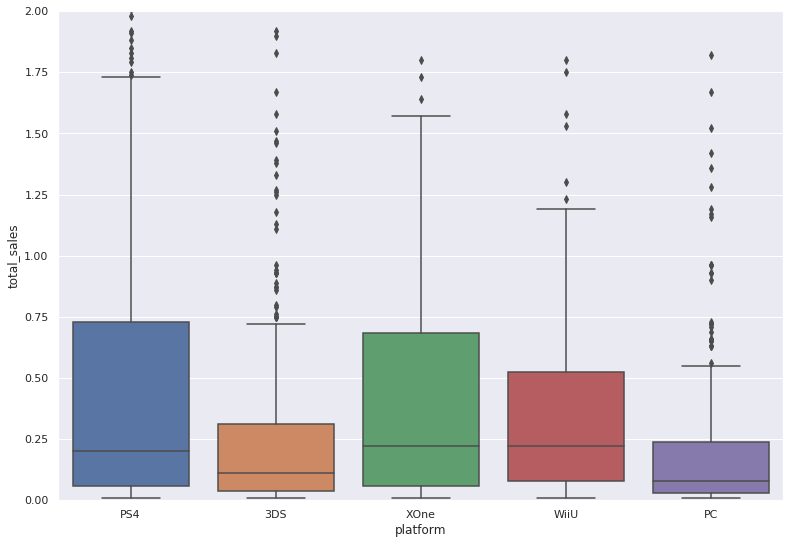

In [13]:
plt.ylim(0, 2)
sns.boxplot(x=data_act_per_plat["platform"], y=total_sales)

Медианы продаж по платформам PS4, XOne и WiiU примерно равны и составляют чуть меньше 0,25 млн.копий, у платформ PC и 3DS они сушественно меньше.

In [14]:
display(data_act_per_plat.loc[data_act_per_plat['total_sales']>2].sort_values(('total_sales'), 
                                                                              ascending=False).head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
4,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90
5,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88,8.7,E,9.17
6,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
7,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98
8,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
9,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60


Самые большие выбросы для платформы PS4 приходятся на игры:   
Call of Duty: Black Ops 3, Grand Theft Auto V, FIFA 16, Star Wars Battlefront (2015), Call of Duty: Advanced Warfare и FIFA 17.    
Для платформы 3DS:  
Pokemon X/Pokemon Y, Pokemon Omega Ruby/Pokemon Alpha Sapphire, New Super Mario Bros. 2, Animal Crossing: New Leaf. 

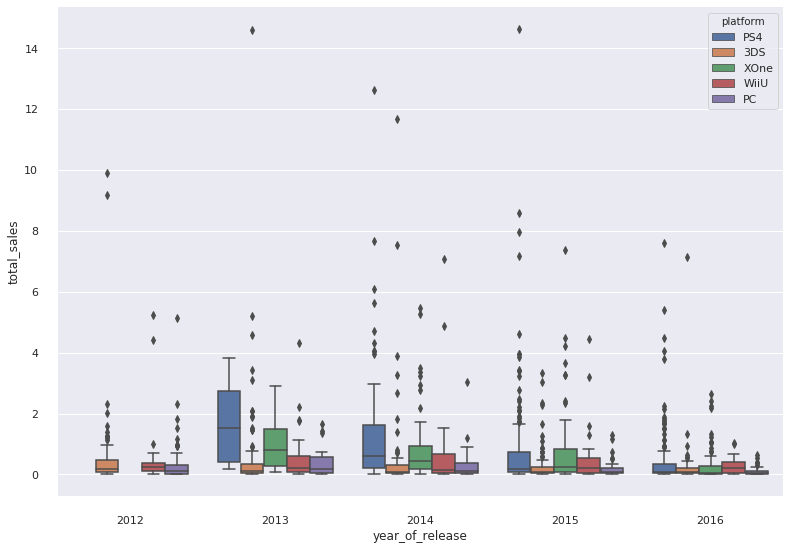

In [15]:
sns.boxplot(x="year_of_release", y=total_sales,
            hue="platform",
            data=data_act_per_plat)
sns.despine(offset=10, trim=True)

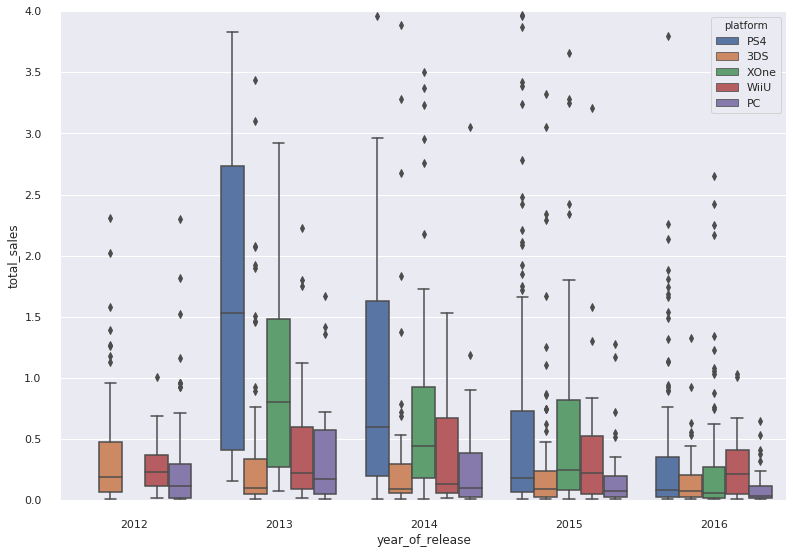

In [16]:
plt.ylim(0, 4)
sns.boxplot(x="year_of_release", y=total_sales,
            hue="platform",
            data=data_act_per_plat)
sns.despine(offset=10, trim=True)

С 2013 по 2015 год ежегодно больше всего продаж копий приходится на игры на платформах PS4 и XOne, причем в 2013 и 2014 годах на платформу PS4 приходилось существенно больше продаж, чем на XOne. Но при этом медиана продаж в 2014 году для платформ PS4 и XOne примерно одинакова. 
Продажи более 4 млн.копий в год являются выбросами для всех платформ за все 5 лет.  
Больше всего продаж было в 2013 году.  


Посмотрим, как влияют на продажи внутри популярной платформы PS4 отзывы пользователей и критиков.  
При этом технические значения оценок -1, которыми были заполнены пропуски, исключаются. 

Коэффициент корреляции между продажами игр и отзывами критиков равен 0.4066


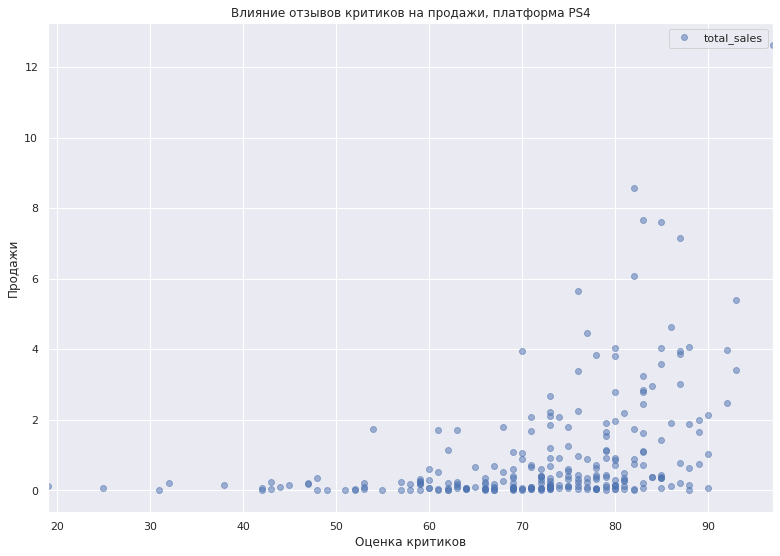

Коэффициент корреляции между продажами игр и отзывами пользователей равен -0.032


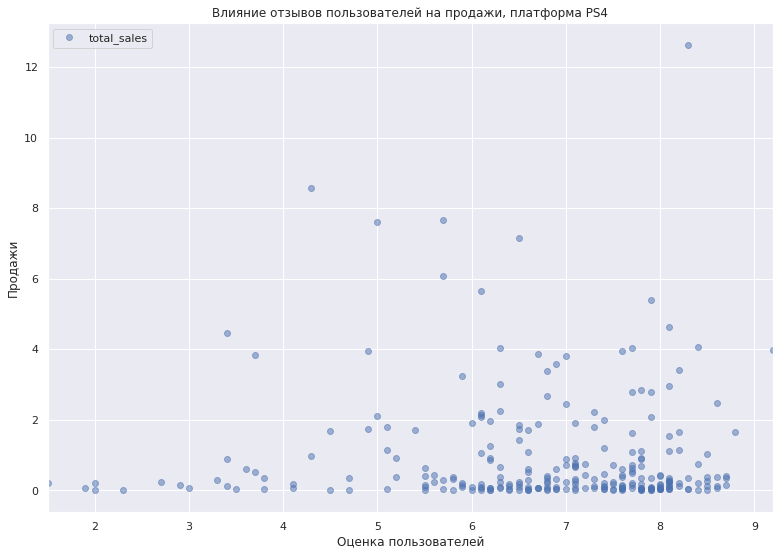

In [17]:
print('Коэффициент корреляции между продажами игр и отзывами критиков равен', 
      round(data_act_per_plat.query('platform == "PS4" & critic_score >=0')['critic_score'].corr(data_act_per_plat.query('platform == "PS4" & critic_score >=0')['total_sales']),4))
data_act_per_plat.query('platform == "PS4" & critic_score >=0').plot(
    x ='critic_score', 
    y ='total_sales', 
    title ='Влияние отзывов критиков на продажи, платформа PS4', 
    style = 'o', grid = True, alpha = 0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

print('Коэффициент корреляции между продажами игр и отзывами пользователей равен', 
      round(data_act_per_plat.query('platform == "PS4" & user_score >=0')['user_score'].corr(data_act_per_plat.query('platform == "PS4" & user_score >=0')['total_sales']),4))
data_act_per_plat.query('platform == "PS4" & user_score >=0').plot(
    x ='user_score', 
    y ='total_sales', 
    title ='Влияние отзывов пользователей на продажи, платформа PS4', 
    style = 'o', grid = True, alpha = 0.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()


На диаграмме рассеяния видно, что, в целом, для платформы PS4 продажи выше при более высокой оценке критиков. Например, продаж более 2 млн.копий для игр с оценкой меньше 70 нет. А больше 6 млн.копий продавалось только при оценке от 80. Коэффициент корреляции свидетельствует о довольно слабой связи этих показателей, тем не менее она есть.  
А оценки пользователей на продажи практически не влияют. 

Коэффициент корреляции между продажами игр и отзывами критиков равен 0.2849


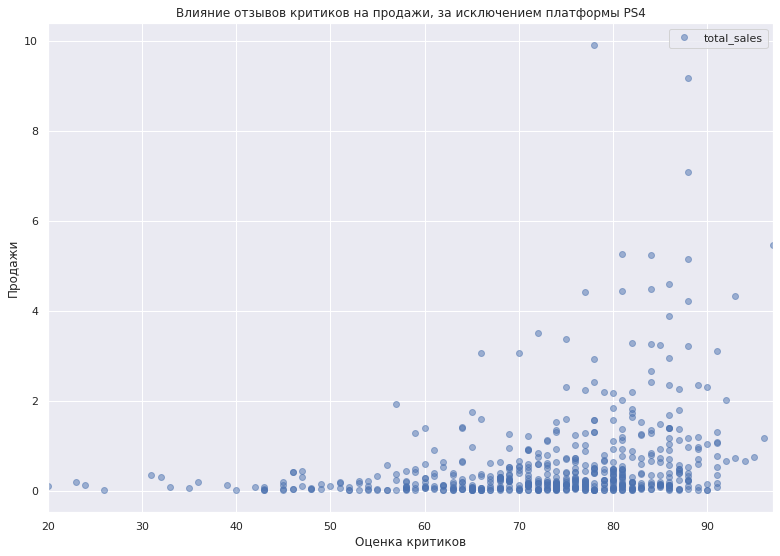

Коэффициент корреляции между продажами игр и отзывами пользователей равен 0.098


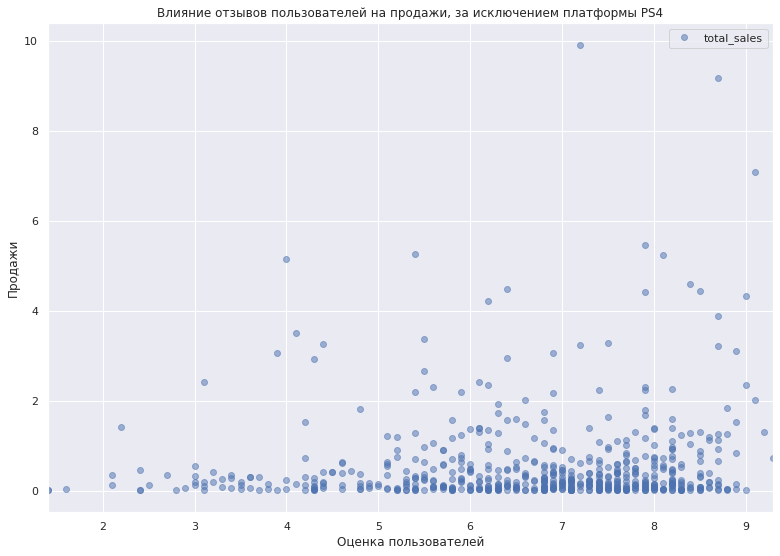

In [18]:
print('Коэффициент корреляции между продажами игр и отзывами критиков равен', 
      round(data_act_per_plat.query('platform != "PS4" & critic_score >=0')['critic_score'].corr(data_act_per_plat.query('platform != "PS4" & critic_score >=0')['total_sales']),4))
data_act_per_plat.query('platform != "PS4" & critic_score >=0').plot(
    x ='critic_score', 
    y ='total_sales', 
    title ='Влияние отзывов критиков на продажи, за исключением платформы PS4', 
    style = 'o', grid = True, alpha = 0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

print('Коэффициент корреляции между продажами игр и отзывами пользователей равен', 
      round(data_act_per_plat.query('platform != "PS4" & user_score >=0')['user_score'].corr(data_act_per_plat.query('platform != "PS4" & user_score >=0')['total_sales']),4))
data_act_per_plat.query('platform != "PS4" & user_score >=0').plot(
    x ='user_score', 
    y ='total_sales', 
    title ='Влияние отзывов пользователей на продажи, за исключением платформы PS4', 
    style = 'o', grid = True, alpha = 0.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

На других платформах также прослеживается некоторая связь оценок критиков и продаж. На диаграмме она чуть менее выраженная, чем для платформы PS4, что подтверждает и коэффициент корреляции, который в данном случае говорит о совсем слабой зависимости.  
Оценки пользователей тоже практически не связаны с продажами, как и для платформы PS4, но, например, единичные значения продаж примерно в 9-10 млн.копий приходятся на игры с высокими оценками пользователей. 

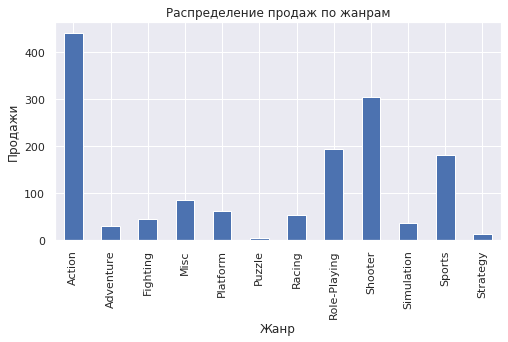

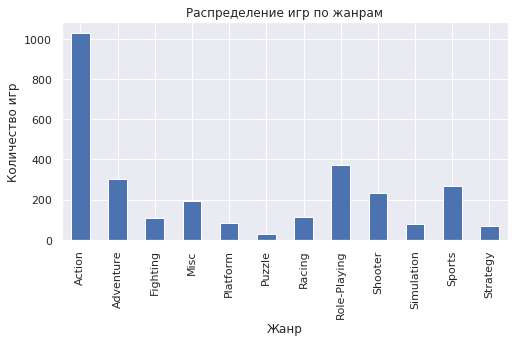

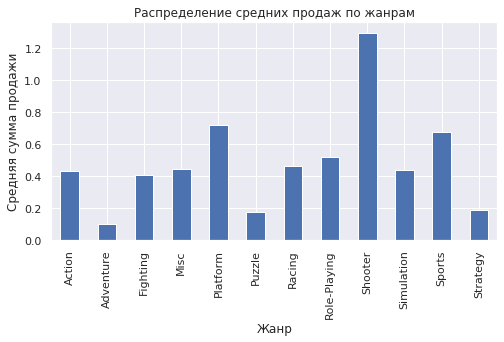

In [19]:
data_act_per.groupby('genre')['total_sales'].sum().plot(kind = 'bar', 
                                                        grid=True, 
                                                        title = 'Распределение продаж по жанрам', 
                                                        figsize = (8,4))
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

data_act_per.groupby('genre')['name'].count().plot(kind = 'bar', 
                                                   grid=True, 
                                                   title = 'Распределение игр по жанрам', 
                                                   figsize = (8,4))
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

data_act_per.groupby('genre')['total_sales'].mean().plot(kind = 'bar', 
                                                         grid=True, 
                                                         title = 'Распределение средних продаж по жанрам', 
                                                         figsize = (8,4))
plt.xlabel('Жанр')
plt.ylabel('Средняя сумма продажи')
plt.show()



Меньше всего продаж в жанрах Strategy и Puzzle, в них же и меньше всего выпущено игр. А, например, в жанре Adventure выпущено одно из самых больших количеств игр, но сумма продаж при этом одна из самых маленьких.
Самое большое количество игр, причем с большим отрывом, выпущено в жанре Action, на него же приходится больше всего продаж. Далее по сумме продаж следует жанр Shooter при относительно небольшом количестве выпущенных игр, на данный жанр и приходится самая большая средняя сумма продаж.

### Вывод

В среднем от появления до исчезновения платформы проходит около 8-10 лет, в связи с чем был выбран актуальный период для дальнейшего анализа в 5 лет - ориентировочное время роста продаж на платформе и их пика.   
Наиболее потенциально прибыльными платформами являются PS4, XOne, 3DS и PC.
С 2013 по 2016 год ежегодно больше всего продаж копий приходилось на игры на платформах PS4 и XOne, причем в 2013 и 2014 годах на платформу PS4 приходилось существенно больше продаж, чем на XOne, при этом медиана продаж в 2014 году для платформ PS4 и XOne примерно одинакова.   
Продажи более 4 млн.копий в год являются выбросами для всех платформ за все рассматриваемые 5 лет.    
На суммарные продажи небольшое влияние оказывают оценки критиков, а оценки пользователей с продажами практически не связаны.   
Самое большое количество игр выпущено в жанре Action, на него же приходится больше всего продаж. Меньше всего игр и продаж приходится на жанры Strategy и Puzzle. Самые высокие средние суммарные продажи у жанра Shooter.   

## Портрет пользователя каждого региона
<a id='4'></a>

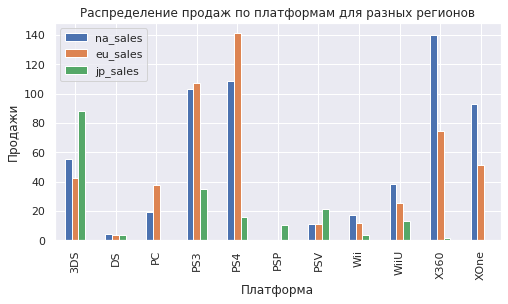

In [20]:
data_act_per.groupby(['platform']).agg({'na_sales':'sum', 
                                        'eu_sales':'sum', 
                                        'jp_sales':'sum'}).plot(kind = 'bar',
                                                                grid=True, 
                                                                title = 'Распределение продаж по платформам для разных регионов', 
                                                                figsize = (8,4))
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

В Северной Америке самые большие продажи приходятся на платформы X360, PS4, PS3, XOne, 3DS и WiiU.  
В Европе самые большие продажи приходятся на платформы PS4, PS3, X360, XOne и PC.  
В Японии самые большие продажи приходятся на платформы 3DS, PS3, PSV, PS4 и WiiU.  
Продажи в Японии намного меньше продаж в Северной Америке и Европе в целом, но по платформе 3DS Япония лидирует.  
PS3 и PS4 примерно одинаково популярен в Северной Америке и Европе, а продажи для X360 и XOne в Северной Америке значительно опережают продажи в Европе. 


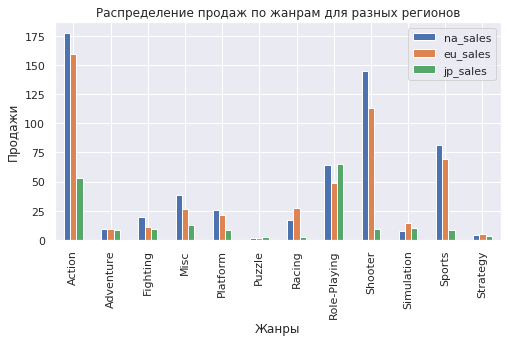

In [21]:
data_act_per.groupby(['genre']).agg({'na_sales':'sum', 
                                     'eu_sales':'sum', 
                                     'jp_sales':'sum'}).plot(kind = 'bar', 
                                                             grid=True, 
                                                             title = 'Распределение продаж по жанрам для разных регионов', 
                                                             figsize = (8,4))
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

В Северной Америке самые популярные жанры это Action, Shooter и Sports, а также Role-Playing и Misc.   
В Европе самые популярные жанры практические те же и примерно в тех же соотношениях - это Action, Shooter и Sports, а также Role-Playing и Racing.   
В Японии больше всего продаж приходится на Role-Playing, далее идет Action, продажи по остальным жанрам значительно меньше, из них можно выделить чуть большие суммы, приходящиеся на Misc, Simulation и Shooter.   
В распределении продаж по платформам для разных стран явно сказывается сильно отличающийся менталитет японцев. 

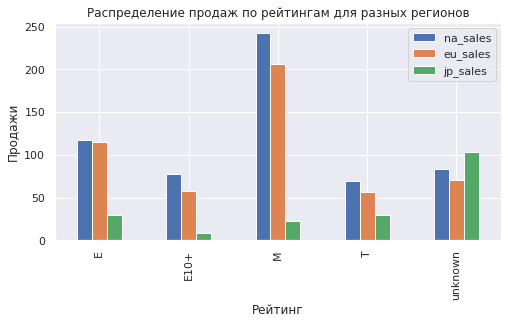

In [22]:
data_act_per.groupby(['rating']).agg({'na_sales':'sum', 
                                      'eu_sales':'sum', 
                                      'jp_sales':'sum'}).plot(kind = 'bar', 
                                                              grid=True, 
                                                              title = 'Распределение продаж по рейтингам для разных регионов', 
                                                              figsize = (8,4))
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

In [23]:
data_act_per[data_act_per['rating'] == 'unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
12,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1,-1.0,unknown,9.18
16,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,-1,-1.0,unknown,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Для Северной Америки и Европы соотношения продаж по разным рейтингам примерно одинаковые. Для Японии доля продаж игр для подростков  выше, а для взрослых - ниже. 

### Вывод

В Северной Америке самые большие продажи за 5 лет приходились на платформы X360, PS4, PS3, XOne. Самые популярные жанры: Action, Shooter и Sports.    
В Европе самые большие за 5 лет приходились на платформы PS4, PS3, X360. Самые популярные жанры те же, что и в Северной Америке: Action, Shooter и Sports.   
В Японии самые большие за 5 лет приходились на платформы 3DS и PS3. Самые популярные жанры: Role-Playing и Action.   
Кроме того, для Северной Америки и Европы соотношения продаж по разным рейтингам игр примерно одинаковые. Для Японии доля продаж игр для подростков  выше, а для взрослых - ниже.    
Таким образом, портреты пользователей из Северной Америки и Европы очень похожи, а в Японии предпочтения другие.    


## Проверка гипотез
<a id='5'></a>

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC.    
Критический уровень статистической значимости зададим значением 0.05.   
Параметр equal_var, укажем как False, т.к. дисперсии различаются.

In [24]:
data_act_per_h = data_act_per.query('user_score >=0')

In [25]:
variance_estimate = np.var(data_act_per_h[data_act_per_h['platform'] == 'XOne']['user_score'], ddof=1)
print(variance_estimate) 
variance_estimate2 = np.var(data_act_per_h[data_act_per_h['platform'] == 'PC']['user_score'], ddof=1)
print(variance_estimate2)

1.9069968429360695
2.770443997158418


In [26]:
alpha = 0.05  

results = st.ttest_ind(data_act_per_h[data_act_per_h['platform'] == 'XOne']['user_score'], data_act_per_h[data_act_per_h['platform'] == 'PC']['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформы XOne примерно равны средним пользовательским рейтингам платформы PC и полученное значение p-value подтверждает, что с высокой вероятностью в почти 55% различие между средними пользовательскими рейтингами платформ XOne и PC можно получить случайно. 

Проверим гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports.   
Критический уровень статистической значимости зададим значением 0.05.  
Параметр equal_var, укажем как False, т.к. дисперсии различаются.

In [27]:
variance_estimate3 = np.var(data_act_per_h[data_act_per_h['genre'] == 'Action']['user_score'], ddof=1)
print(variance_estimate3) 
variance_estimate4 = np.var(data_act_per_h[data_act_per_h['genre'] == 'Sports']['user_score'], ddof=1)
print(variance_estimate4)

1.8890840494348111
3.022890298704732


In [28]:
alpha = 0.05  

results = st.ttest_ind(data_act_per_h[data_act_per_h['genre'] == 'Action']['user_score'], data_act_per_h[data_act_per_h['genre'] == 'Sports']['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports различаются и полученное значение p-value говорит о том, что такое различие между выручкой на тарифах не случайно.

### Вывод

Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась. Гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC отвергнуть не получилось.

## Общий вывод
<a id='6'></a>

У пользователей в Северной Америке и Европе предпочтения отличаются от пользователей в Японии, что следует учитывать при планировании рекламных кампаний для разных регионов.    
В Северной Америке и Европе предпочитают игры для платформ PS4 и XOne, а в Японии - для 3DS.   
В Северной Америке и Европе наиболее популярные жанры Action, Shooter и Sports, в Японии - Role-Playing и Action.   
В Северной Америке и Европе большей популярностью пользуются игры с рейтингом "для взрослых" и "для всех", в Японии - "для подростков" и "для всех".  
На продажи в некоторой степени влияют оценки критиков - наибольшие продажи приходятся на игры с более высокими оценками, при этом оценки пользователей с суммарными продажами практически не связаны.   